# Travel and Tourism Reform Project

### Documentation

**Dataframes:** 
- df_qcontcust_2009_2019 -> contains data on all years between 2009 - 2019
- df_qcontcust_2009, df_qcontcust_2010, ... to df_qcontcust_2019 -> filtered from df_qcontcust_2009_2019 for each year
- df_qcontcust_2022 -> contains data for 2022 
***


## Importing Packages

In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
import json

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight

#from itertools import product

from imblearn.over_sampling import RandomOverSampler

#from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [2]:
df_qcontcust_2009_2019 = pd.read_csv("C:\\Users\\medasud\\Downloads\\2013-UKDA-7380-tab\\tab\\qcontcust_2009_2019.tab", delimiter='\t')
#filtering the dataset into different years
df_qcontcust_2009 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2009]
df_qcontcust_2010 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2010]
df_qcontcust_2011 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2011]
df_qcontcust_2012 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2012]
df_qcontcust_2013 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2013]
df_qcontcust_2014 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2014]
df_qcontcust_2015 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2015]
df_qcontcust_2016 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2016]
df_qcontcust_2017 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2017]
df_qcontcust_2018 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2018]
df_qcontcust_2019 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2019]
df_qcontcust_2022 = pd.read_csv("C:\\Users\\medasud\\Downloads\\2022-UKDA-9122-tab\\tab\\qcontcust2022.tab", delimiter='\t')


df_qreg_2013 = pd.read_csv("C:\\Users\\medasud\\Downloads\\2013-UKDA-7380-tab\\tab\\qreg_2013.tab", delimiter='\t')
df_qreg_2014 = pd.read_csv("C:\\Users\\medasud\\Downloads\\2014-UKDA-7534-tab\\tab\\qreg_2014.tab", delimiter='\t')
df_qreg_2015 = pd.read_csv("C:\\Users\\medasud\\Downloads\\2015-UKDA-7754-tab\\tab\\qreg_2015.tab", delimiter='\t')
df_qreg_2016 = pd.read_csv("C:\\Users\\medasud\\Downloads\\2016-UKDA-8016-tab\\tab\\qreg_2016.tab", delimiter='\t')
df_qreg_2017 = pd.read_csv("C:\\Users\\medasud\\Downloads\\2017-UKDA-8286-tab\\tab\\qreg_2017.tab", delimiter='\t')
df_qreg_2018 = pd.read_csv("C:\\Users\\medasud\\Downloads\\2018-UKDA-8468-tab\\tab\\qreg_2018.tab", delimiter='\t')
df_qreg_2019 = pd.read_csv("C:\\Users\\medasud\\Downloads\\2019-UKDA-8575-tab\\tab\\qreg_2019.tab", delimiter='\t')
df_qreg_2022 = pd.read_csv("C:\\Users\\medasud\\Downloads\\2022-UKDA-9122-tab\\tab\\qreg_2022.tab", delimiter='\t')
#qreg is not available for 2009-2012


In [3]:
df_qcontcust_2017.columns

Index(['Serial', 'Year', 'Quarter', 'Month', 'Flow', 'res', 'cty', 'nation',
       'purp', 'Purpose', 'county', 'Age', 'Sex', 'ukport', 'Nationality',
       'Residence', 'CountryVisit', 'country', 'port1', 'port2', 'AirPortCode',
       'ChangeCode', 'UKLEG', 'OVLEG', 'DIRECTLEG', 'origdest', 'carrier1',
       'transfer', 'flprefix', 'shuttnum', 'bustick', 'flightyp', 'Vehicle',
       'vehno', 'persons', 'indtouk', 'ind', 'itcost', 'ninfare', 'ninfarek',
       'fare', 'farek', 'expppv', 'netexp', 'mtrans', 'highexp', 'haul',
       'seaind', 'shift', 'quality', 'stay', 'spend', 'spendk', 'TandTSI',
       'FinalWeight', 'DayOfWeek', 'shiftWeight', 'NonRespWeight',
       'minimumsWeight', 'sampTrafficWeight', 'unsampTrafficWeight',
       'Old_imbalanceWeight', 'shiftWeightgrp', 'NRWeightgrp', 'minsWeightgrp',
       'sampTrafficWtgrp', 'UnsampwgtPortgrp', 'UnsampwtRegiongrp'],
      dtype='object')

In [4]:
#list of columns to drop
#these variables will not be used in this project
columns_to_drop = ['UKLEG', 'OVLEG', 'DIRECTLEG', 'shiftWeight', 'NonRespWeight', 'minimumsWeight', 
                   'sampTrafficWeight', 'flprefix', 'shuttnum', 'bustick', 'indtouk', 'ind', 
                   'itcost', 'ninfare', 'ninfarek', 'fare', 'farek', 'mtrans', 'highexp', 'haul',
                   'seaind', 'TandTSI', 'unsampTrafficWeight', 'Old_imbalanceWeight', 'shiftWeightgrp',
                   'NRWeightgrp', 'minsWeightgrp', 'sampTrafficWtgrp', 'UnsampwgtPortgrp',
                   'UnsampwtRegiongrp']

dataframes = [df_qcontcust_2009, df_qcontcust_2010, df_qcontcust_2011, df_qcontcust_2012,
              df_qcontcust_2013, df_qcontcust_2014, df_qcontcust_2015, df_qcontcust_2016,
              df_qcontcust_2017, df_qcontcust_2018, df_qcontcust_2019]
#iterate over the list of dataframes and drop the columns
for df in dataframes:
    df.drop(columns=columns_to_drop, inplace=True)

In [5]:
df_qcontcust_2022.columns

Index(['Serial', 'Year', 'Quarter', 'Month', 'Flow', 'res', 'cty', 'nation',
       'purp', 'Purpose', 'county', 'Age', 'Sex', 'ukport', 'Nationality',
       'Residence', 'CountryVisit', 'country', 'port1', 'port2', 'AirPortCode',
       'ChangeCode', 'UKLEG', 'OVLEG', 'DIRECTLEG', 'origdest', 'carrier1',
       'transfer', 'flprefix', 'shuttnum', 'bustick', 'flightyp', 'Vehicle',
       'vehno', 'persons', 'indtouk', 'ind', 'itcost', 'ninfare', 'ninfarek',
       'Fare', 'expppv', 'NetExp', 'haul', 'seaind', 'shift', 'Quality',
       'Stay', 'Spend', 'TANDTSI', 'FinalWeight', 'IntDate', 'shiftWeight',
       'NonRespWeight', 'minimumsWeight', 'sampTrafficWeight',
       'unsampTrafficWeight', 'old_ImbalanceWeight', 'shiftWeightgrp',
       'NRWeightgrp', 'minsWeightgrp', 'sampTrafficWtgrp', 'UnsampwgtPortgrp',
       'UnsampwtRegiongrp'],
      dtype='object')

In [6]:
#list of columns to drop
columns_to_drop = ['shiftWeight', 'NonRespWeight', 'minimumsWeight', 'sampTrafficWeight',
                   'unsampTrafficWeight', 'old_ImbalanceWeight', 'shiftWeightgrp',
                   'NRWeightgrp', 'minsWeightgrp', 'sampTrafficWtgrp', 'UnsampwgtPortgrp',
                   'UnsampwtRegiongrp', 'UKLEG', 'OVLEG', 'DIRECTLEG','flprefix', 'shuttnum', 
                   'bustick', 'indtouk', 'ind', 'itcost', 'ninfare', 'ninfarek', 'seaind', 
                   'TANDTSI','haul']

#column names are different for the other dataframes
df_qcontcust_2022.drop(columns=columns_to_drop, inplace=True)

## Creating New Variables from Mappings

In [7]:
#dictionary for flow
flow_dict = {
    1.0: "Air Departure Foreign",
    2.0: "Air Departure UK",
    3.0: "Air Arrival Foreign",
    4.0: "Air Arrival UK",
    5.0: "Sea Departure Foreign",
    6.0: "Sea Departure UK",
    7.0: "Sea Arrival Foreign",
    8.0: "Sea Arrival UK"
}

#function to create Flow_Label column for all years

def create_flow_label_column(df):
    """
    This function creates a new column FLow_Label which is derived from the column Flow
    and an external data dictionary mapping the integer/float values in Flow to their respective 
    values. This is for all years.

    Parameters:
    param1 : the dataframe being manipulated
 
    Returns:
    no return value. When the function is called, the new column is created.
    """
    #fill missing values in Purpose column with -1
    df['Flow'].replace(' ', np.nan, inplace=True)
    df['Flow'].fillna(-1, inplace=True)
    df['Flow'] = df['Flow'].astype(float)
    df['Flow'].replace('-1', np.nan, inplace=True)
    
    df['Flow_Label'] = df['Flow'].map(flow_dict)

#call this function for df_qcontcust of each year
dataframes = [df_qcontcust_2009, df_qcontcust_2010, df_qcontcust_2011, df_qcontcust_2012,
              df_qcontcust_2013, df_qcontcust_2014, df_qcontcust_2015, df_qcontcust_2016,
              df_qcontcust_2017, df_qcontcust_2018, df_qcontcust_2019, df_qcontcust_2022]

#iterate over the list of dataframes and apply the function
for df in dataframes:
    create_flow_label_column(df)

In [8]:
df_qcontcust_2015['Flow_Label'].value_counts()

Flow_Label
Air Departure UK         103740
Air Arrival UK            55851
Air Arrival Foreign       54274
Air Departure Foreign     41071
Sea Departure UK          13884
Sea Arrival Foreign       11296
Sea Arrival UK             9825
Sea Departure Foreign      9146
Name: count, dtype: int64

In [9]:
#create new column Purpose_Label for years 2009-19

#load the mapping from the JSON file
file_path = "C:\\Users\\medasud\\Documents\\Project1\\Purpose_value_map_0919.json"
with open(file_path, 'r') as json_file:
    purpose_mapping_0919 = json.load(json_file)

#function to create Purpose_Label column
def create_purpose_column_0919(df, mapping):
    """
    This function creates a new column Purpose_Label which is derived from the column Purpose
    and an external data dictionary mapping the integer/float values in Purpose to their respective 
    purposes. This is for the years 2009-2019 only.

    Parameters:
    param1 : the dataframe being manipulated
    param2 : the mapping from the json file

    Returns:
    no return value. When the function is called, the new column is created.
    """
    df['Purpose'].replace(' ', pd.NA, inplace=True)
    df['Purpose'].fillna(-1, inplace=True)
    df['Purpose'] = df['Purpose'].astype(float)
    df['Purpose'] = df['Purpose'].astype(str)
    
    # Create a new column "Purpose_Label" by mapping the values
    df['Purpose_Label'] = df['Purpose'].map(mapping)
    df['Purpose'] = df['Purpose'].astype(float)
    
#call this function for df_qcontcust of each year
dataframes = [df_qcontcust_2009, df_qcontcust_2010, df_qcontcust_2011, df_qcontcust_2012,
              df_qcontcust_2013, df_qcontcust_2014, df_qcontcust_2015, df_qcontcust_2016,
              df_qcontcust_2017, df_qcontcust_2018, df_qcontcust_2019]

#iterate over the list of dataframes and apply the function
for df in dataframes:
    create_purpose_column_0919(df, purpose_mapping_0919)


In [18]:
#create new column Purpose_Label for years 2022

#load the mapping from the JSON file
file_path = "C:\\Users\\medasud\\Documents\\Project1\\Purpose_value_map_22.json"
with open(file_path, 'r') as json_file:
    purpose_mapping_22 = json.load(json_file)
    
#function to create Purpose_Label column
def create_purpose_column_22(df, mapping):
    """
    This function creates a new column Purpose_Label which is derived from the column Purpose
    and an external data dictionary mapping the integer/float values in Purpose to their respective 
    purposes. This is for the years 2022 only as the Purpose codes are different for this year.
    Purpose codes for subsequent years are likely to remain the same, and in that case, this function
    can be reused.

    Parameters:
    param1 : the dataframe being manipulated
    param2 : the mapping from the json file

    Returns:
    no return value. When the function is called, the new column is created.
    """
    
    df['Purpose'].replace(' ', pd.NA, inplace=True)
    df['Purpose'].fillna(-1, inplace=True)
    df['Purpose'] = df['Purpose'].astype(float)
    df['Purpose'] = df['Purpose'].astype(str)
    
    # Create a new column "Purpose_Label" by mapping the values
    df['Purpose_Label'] = df['Purpose'].map(mapping)
    df['Purpose'] = df['Purpose'].astype(float)
    
#call the function
create_purpose_column_22(df_qcontcust_2022, purpose_mapping_22)


In [19]:
df_qcontcust_2022['Purpose_Label'].value_counts()

Purpose_Label
Holiday/pleasure                                               51586
Visit family (priority)                                        29972
Business; Work                                                 11315
Visit friends                                                   4723
Same day transit                                                2970
Overnight transit                                               1372
OTHER                                                           1098
Watch sport                                                     1043
Play amateur sport                                               645
Definite job to go to                                            528
Medical Treatment                                                476
Cruise 0-2 nights ashore - For                                   242
International commuter                                           216
Military or embassy (serving on duty)                            178
First or Foundation 

In [20]:
df_qcontcust_2013['Purpose_Label'].value_counts()

Purpose_Label
Holiday/pleasure                                      50472
Visit family (priority)                               22423
Business; Work                                        18709
Visit friends                                          4677
Same day transit                                       3180
Overnight transit                                      1331
Play amateur sport                                     1157
OTHER                                                  1151
Watch sport                                            1060
Personal shopping                                       743
Other formal study                                      654
Cruise 0-2 nights ashore - For                          408
Definite job to go to                                   345
Accompany / join                                        242
Medical treatment                                       211
Cruise 0-2 nights ashore - UK                           209
Military (serving on duty)

In [21]:
#create new column Nationality_Label for years 2009-19

#load the mapping from the JSON file
file_path = "C:\\Users\\medasud\\Documents\\Project1\\Nationality_value_map_0919.json"
with open(file_path, 'r') as json_file:
    nationality_mapping_0919 = json.load(json_file)

#function to create Nationality_Label column for 2009-2019
def create_nationality_label_column_0919(df):
    """
    This function creates a new column Nationality_Label which is derived from the column Nationality
    and an external data dictionary mapping the integer/float values in Nationality to their respective 
    purposes. This is for the years 2009-2019 only.

    Parameters:
    param1 : the dataframe being manipulated.

    Returns:
    return value. When the function is called, the new column is created.
    """
    df['Nationality'].replace(' ', np.nan, inplace=True)
    df['Nationality'].fillna(-1, inplace=True)
    #changing to the datatype to str to facilitate mapping as the JSON file has the key as type string by default
    df['Nationality'] = df['Nationality'].astype(str)
    
    #create a new column Nationality_Label by mapping the values
    df['Nationality_Label'] = df['Nationality'].map(nationality_mapping_0919)
    df['Nationality_Label'].fillna(("Unknown"), inplace=True)
    df['Nationality'] = df['Nationality'].astype(float) 

#call this function for df_qcontcust of each year
dataframes = [df_qcontcust_2009, df_qcontcust_2010, df_qcontcust_2011, df_qcontcust_2012,
              df_qcontcust_2013, df_qcontcust_2014, df_qcontcust_2015, df_qcontcust_2016,
              df_qcontcust_2017, df_qcontcust_2018, df_qcontcust_2019]

#iterate over the list of dataframes and apply the function for 2009-2019
for df in dataframes:
    create_nationality_label_column_0919(df)


In [22]:
#create new column Nationality_Label for years 2022 onwards

#load the mapping from the JSON file
file_path = "C:\\Users\\medasud\\Documents\\Project1\\Nationality_value_map_22.json"
with open(file_path, 'r') as json_file:
    nationality_mapping_22 = json.load(json_file)
    
#function to create Nationality_Label column for 2022 onwards
def create_nationality_label_column_22(df):
    """
    This function creates a new column Nationality_Label which is derived from the column Nationality
    and an external data dictionary mapping the integer/float values in Nationality to their respective 
    purposes for the year 2022 and onwards.
    
    Parameters:
    param1 : the dataframe being manipulated.

    Returns:
    no return value. When the function is called, the new column is created.
    """
    df['Nationality'].replace(' ', np.nan, inplace=True)
    df['Nationality'].fillna(-1, inplace=True)
    #changing to the datatype to str to facilitate mapping as the JSON file has the key as type string by default
    df['Nationality'] = df['Nationality'].astype(str)
    
    #create a new column Nationality_Label by mapping the values
    df['Nationality_Label'] = df['Nationality'].map(nationality_mapping_22)
    df['Nationality_Label'].fillna(("Unknown"), inplace=True)
    df['Nationality'] = df['Nationality'].astype(float) 

#call this function for df_qcontcust_2022
for df in dataframes:
    create_nationality_label_column_22(df_qcontcust_2022)


In [23]:
df_qcontcust_2022['Nationality_Label'].value_counts()

Nationality_Label
UK                      157672
USA                      17817
Irish Republic            9862
France/Corsica            8407
Poland                    7766
                         ...  
Papua New Guinea             1
Surinam/Dutch Guiana         1
Gabon                        1
Bhutan                       1
Burkina Faso                 1
Name: count, Length: 211, dtype: int64

In [24]:
df_qcontcust_2017['Nationality_Label'].value_counts()

Nationality_Label
UK/United Kingdom               137118
USA/United States of America     14062
France                            8991
Poland                            8421
Germany                           7605
                                 ...  
Korea, North                         1
San Marino                           1
Lesotho                              1
Guinea - Bissau                      1
Cape Verde Islands                   1
Name: count, Length: 198, dtype: int64

In [25]:
#function to create Stay_Category

def create_stay_category_column(df):
    """
    This function creates a new column Stay_Category which is derived from the column Stay, a numeric continuous variable.
    The Stay_Category column is used to convert Stay into factor levels that can later be used for model training purposes,
    as most of the variables in this dataset are also categorical.

    Parameters:
    param1 : the dataframe being manipulated.

    Returns:
    no return value. When the function is called, the new column is created.
    """
    
    #the variable names are different across the dataframes so we accomodate this
    stay_column_name = next((col for col in ['Stay', 'stay'] if col in df.columns), None)
    if stay_column_name is not None:
        df[stay_column_name].replace(' ', np.nan, inplace=True)
        df[stay_column_name] = pd.to_numeric(df[stay_column_name], errors='coerce')
    
    #we only want to consider stays for less than a year
    #removing outliers in Stay duration, only retaining stays that are less than a year
    df[stay_column_name] = df[stay_column_name].astype(float)
    df[stay_column_name] = df[stay_column_name][df[stay_column_name] <= 365]
    intervals = [1, 3, 13, 27, 90, 180, 365]
    labels = ['1-3 days', '4-13 days', '14-27 days', '1-3 months', '3-6 months', '6-12 months']
    df['Stay_Category'] = pd.cut(df[stay_column_name], bins=intervals, labels=labels)
    
#call this function for df_qcontcust of each year
dataframes = [df_qcontcust_2009, df_qcontcust_2010, df_qcontcust_2011, df_qcontcust_2012,
              df_qcontcust_2013, df_qcontcust_2014, df_qcontcust_2015, df_qcontcust_2016,
              df_qcontcust_2017, df_qcontcust_2018, df_qcontcust_2019, df_qcontcust_2022]

#iterate over the list of dataframes and apply the function for all years
for df in dataframes:
    create_stay_category_column(df)


In [26]:
#function to create Spend_Category

def create_spend_category_column(df):
    """
    This function creates a new column Spend_Category which is derived from the column Spend, a numeric continuous variable.
    The Spend_Category column is used to convert Spend into factor levels that can later be used for model training purposes,
    as most of the variables in this dataset are also categorical.

    Parameters:
    param1 : the dataframe being manipulated.

    Returns:
    no return value. When the function is called, the new column is created.
    """
    #the variable names are different across the dataframes so we accommodate this
    spend_column_name = next((col for col in ['Spend', 'spend'] if col in df.columns), None)
    if spend_column_name is not None:
        df[spend_column_name].replace(' ', np.nan, inplace=True)
        df[spend_column_name] = pd.to_numeric(df[spend_column_name], errors='coerce')

        #we only want to consider expenditure less than 10k as more than that would be outliers
        df[spend_column_name] = df[spend_column_name].astype(float)
        df[spend_column_name] = df[spend_column_name][df[spend_column_name] <= 10000]

        intervals = [0, 250, 500, 1000, 5000, float('inf')]
        labels = ['0-250 GBP', '250-500 GBP', '500-1000 GBP', '1000-5000 GBP', 'more than 5000 GBP']
        df['Spend_Category'] = pd.cut(df[spend_column_name], bins=intervals, labels=labels)

#call this function for df_qcontcust of each year
dataframes = [df_qcontcust_2009, df_qcontcust_2010, df_qcontcust_2011, df_qcontcust_2012,
              df_qcontcust_2013, df_qcontcust_2014, df_qcontcust_2015, df_qcontcust_2016,
              df_qcontcust_2017, df_qcontcust_2018, df_qcontcust_2019, df_qcontcust_2022]

#iterate over the list of dataframes and apply the function for all years
for df in dataframes:
    create_spend_category_column(df)


In [27]:
df_qcontcust_2016['Stay_Category'].value_counts()

Stay_Category
4-13 days      48027
1-3 days       22130
14-27 days     13932
1-3 months      4589
3-6 months       677
6-12 months      223
Name: count, dtype: int64

In [28]:
df_qcontcust_2018['Spend_Category'].value_counts()

Spend_Category
0-250 GBP             21868
250-500 GBP           17910
500-1000 GBP          16606
1000-5000 GBP         11576
more than 5000 GBP      480
Name: count, dtype: int64

In [29]:
#purposes of visit that we are not interested in for years
excluded_purposes = ["International commuter", "Immigrating/Emigrating", "Overnight transit", "Asylum Seeker",
                     "Same day transit", "Military (serving on duty)", "Returning Home To Live", 
                     "Merchant navy (joining or leaving ship)", "Military or embassy (serving on duty)",
                     "Airline crew (positioning)", "Coding query", "Looking for work"]


In [30]:
#create column Broad_Purpose to catgorise the different purposes of visit into 4 main categories

def create_broad_purpose_column(df):
    """
    This function creates a new column Broad_Purpose which is derived from the column Purpose_Label.
    Broad_Purpose catgorises the different purposes of visit into 4 main categories. These purposes will
    be further filtered later in this notebook.
    Broad_Purpose is the main variable of interest in this project.

    Parameters:
    param1 : the dataframe being manipulated.

    Returns:
    no return value. When the function is called, the new column is created.
    """
    #define the conditions for the different purposes
    conditions = [
        df['Purpose_Label'].isin(["Holiday/pleasure", "Getting married", "Play amateur sport",
                                  "Watch sport", "Personal shopping", "Religious Pilgrimage",
                                  "Cruise 0-2 nights ashore - UK", "Olympics/Paralympics Watch",
                                  "Cruise 0-2 nights ashore - For"]),
        df['Purpose_Label'].isin(["Business; Work", "Visit trade fair", "Conference 20+ people",
                                  "Definite job to go to", "Working Holiday", 
                                  "Olympics/Paralympics Participate", "Olympics/Paralympics Work"]),
        df['Purpose_Label'].isin(["Visit family (priority)", "Visit friends"]),
        df['Purpose_Label'].isin(["First/foundation degree", "Higher/PostGrad degree",
                                  "English language course", "Course between school and degree",
                                  "Secondary education", "Professional qualification",
                                  "Other formal study", "University Degree or Diploma",
                                  "Formal course (check residence and definition)", "Formal Course",
                                  "Other Course Below Degree Level & Above Secondary Education",
                                  "English language course (not degree level)", "Au Pair", 
                                  "Medical treatment", "Accompany / join", "OTHER",
                                  "Unacc schoolchild (16 or under, school to parents)", 
                                  "Joining another traveller","Accompany another traveller"]),
        df['Purpose_Label'].isin(excluded_purposes),
        df['Purpose_Label'].isna(),
    ]
    #migrants will be filtered out later, but we will keep them for now
    #map the different purposes to their new labels
    choices = ["Holiday", "Business or Work", "VFF", "Education and Other", "Migrants/In-eligibles", "N/A"]
    #create the column
    df['Broad_Purpose'] = np.select(conditions, choices, default='N/A')
    
    
#call this function for df_qcontcust of each year
dataframes = [df_qcontcust_2009, df_qcontcust_2010, df_qcontcust_2011, df_qcontcust_2012,
              df_qcontcust_2013, df_qcontcust_2014, df_qcontcust_2015, df_qcontcust_2016,
              df_qcontcust_2017, df_qcontcust_2018, df_qcontcust_2019, df_qcontcust_2022]

#iterate over the list of dataframes and apply the function for all years
for df in dataframes:
    create_broad_purpose_column(df)

In [31]:
df_qcontcust_2015['Broad_Purpose'].value_counts()

Broad_Purpose
N/A                      192230
Holiday                   54945
VFF                       27150
Business or Work          18057
Migrants/In-eligibles      4277
Education and Other        2428
Name: count, dtype: int64

In [32]:
#create Broad_Nationality column
#define the countries for each broad nationality

north_america = ["Canada", "Haiti", "Mexico", "USA", "US Virgin Isles", "USA/United States of America"]  

south_and_central_america = ["Argentina", "Bahamas", "Barbados", "Barbuda/Antigua", "Belize", "Bolivia", "Brazil", "Chile", 
                             "Colombia", "Costa Rica", "El Salvador", "Guatemala", "Cuba", "Dominican Republic", 
                             "Dominica", "Ecuador", "Guyana", "Honduras", "Jamaica", "Nicaragua", "Panama",
                             "Peru", "Paraguay", "Puerto Rico", "Surinam/Dutch Guiana", "Trinidad & Tobago", 
                             "Uruguay", "Venezuela"]


uk = ["UK", "UK/United Kingdom"]

eu = ["Austria", "Belgium", "Bosnia Herzegovina", "Bulgaria", "Croatia", "Czech Republic", "Denmark",
      "Estonia", "Finland", "France/Corsica", "France", "French Guiana", "Mayotte", "Germany", 
      "Greece/Crete/Rhodes", "Greece", "Southern (Greek) Cyprus", "Hungary", "Irish Republic", "Ireland", "Italy", "Italy/Sardinia", "Latvia",
      "Guadeloupe", "Lithuania", "Luxembourg", "Netherlands", "Martinique", "Malta", "Holland", "Portugal", 
      "Poland", "Madeira/Azores", "Reunion Island", "Romania", "Slovakia", "Slovenia", "Sweden", "Spain", 
      "Spain/Balearic", "Canary Islands"  , "Portugal/Portucalense/Portugal", "Turkish Republic of North Cyprus"
      ]

non_eu_europe = ["Albania", "Andorra", "Azerbaijan", "Armenia", "Belarus", "Aland Islands", "Georgia", 
                 "Gibraltar", "Vatican", "Iceland", "Liechtenstein", "Monaco", "Moldova", "Montenegro",
                 "Norway", "Serbia", "Switzerland", "Macedonia", "North Cyprus", "South Cyprus", "Kosova"]


africa = ["Algeria", "Angola", "Botswana", "Burundi", "Cameroon", "Cape Verde Islands", "Central African Rep",
          "Chad", "Comoros", "Congo (Brazzaville)", "Democratic Republic of Congo", "Benin", "South Sudan",
          "Equatorial Guinea", "Ethiopia", "South Sudan", "Eritrea", "Djibouti", "Gabon", "Gambia", "Ghana",
          "Guinea", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali",
          "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Guinea - Bissau",
          "Rwanda", "Sao Tome", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "Zimbabwe",
          "North Sudan", "Swaziland", "Togo", "Tunisia", "Uganda", "Egypt", "Tanzania", "Tanzania/Zanzibar", 
          "Burkina Faso", "Zambia", "Benin (formerly Dahomey)"]


asia = ["Afghanistan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Myanmar (Burma)", "Cambodia/Kampuchea", 
        "Sri Lanka", "China (excl Taiwan)/Tibet", "China/Tibet", "Cambodia", "Taiwan", "Palestine", "Hong Kong", "Hong Kong Special", 
        "India", "Bali/Borneo/Indonesia", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Kazakhstan", "Jordan", 
        "North Korea", "South Korea", "Korea, South Rep", "Korea, North", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Macao", "Malaysia", "Maldives",
        "Mongolia", "Oman", "Nepal", "Pakistan", "Philippines", "East Timor", "Qatar", "Russia", "Saudi Arabia",
        "Singapore", "Vietnam", "Syria", "Tajikistan", "Thailand", "Turkey", "United Arab Emirates", 
        "Turkmenistan", "Ukraine", "Uzbekistan", "Yemen (North & South)"]

oceania = ["Australia", "Christmas Is/Oceania", "Cocos I/Oceania", "Cook Is/Oceania", "Fiji", "Oceania Islands",
           "Guam", "Nauru/Oceania", "Vanuatu", "New Zealand", "Niue Island", "Norfolk Island", "Micronesia",
           "Marshall Island", "Palau", "Papua New Guinea", "Wallis & Futuna Islands", "Samoa", 
           "Ellice Island/Oceania", "Tonga/Oceania"]


other = ["American Samoa/Oceania", "Antartica", "Antarctica etc (Foreign)", "Antigua",  "Bermuda", "Bouvet Island",
         "British Indian Ocean Territory", "Solomon Island", "Virgin Islands (Br)", "Cayman Islands",
         "Faroe Islands", "Falkland Is/British Antarctic", "South Georgia/South Sanwich Islands", 
         "French Polynesia/Tahiti", "French Sthrn/Antarctic Territories", "Greenland", "Grenada",
         "Heard & McDonald Islands", "Curacao", "Bonaire", "St Maarten", "Montserrat", "Antilles", "Aruba",
         "Netherlands Antilles", "New Caledonia", "Mariana Island", "Pacific Islands", "Pitcairn Islands", 
         "St Barthelemy", "Ascension Islands/St Helena/Trist", "Nevis/St Kitts", "Anguilla", "St Lucia",
         "St Martin", "St Pierre et Miquelon", "Grenadines/St Vincent", "San Marino", "Turks & Caicos Islands",
         "British Overseas", "Guernsey", "Jersey", "Isle Of Man", "Channel Islands"] 
        #carribean countries, british overseas territory included

not_disclosed = ["Country not disclosed", "Stateless", "Country Not Stated", "Short Haul", 
                 "Cruise - Europe/Departures", "Cruise - Elsewhere/Departures", 
                 "Cruise - Europe/Arrivals - UK Ship", "Cruise - Europe/Arrivals - Foreign Ship", 
                 "Cruise - Europe/Arrivals - DK Ship", "Cruise - Elsewhere/Arrivals - UK Ship", 
                 "Cruise - Elsewhere/Arrivals - Foreign Ship", "Cruise - Elsewhere/Arrivals - DK Ship", 
                 "Cruise - DK where - Arr & Dep"]

#function to categorize countries
def create_broad_nationality_column(country):
    """
    This function creates a new column Broad_Purpose which is derived from the column Purpose_Label.
    Broad_Purpose catgorises the different purposes of visit into 4 main categories. These purposes will
    be further filtered later in this notebook.
    Broad_Purpose is the main variable of interest in this project.

    Parameters:
    param1 : the dataframe being manipulated.

    Returns:
    string: The broad nationality that the country belongs to.
    """
    
    if country in north_america:
        return "North America"
    elif country in south_and_central_america:
        return "South America"
    elif country in eu:
        return "EU"
    elif country in uk:
        return "UK"
    elif country in non_eu_europe:
        return "Non-EU Europe"
    elif country in africa:
        return "Africa"
    elif country in asia:
        return "Asia"
    elif country in oceania:
        return "Australia, NZ and Oceania"
    elif country in other:
        return "Other"   
    else:
        return "Not disclosed"

#call this function for df_qcontcust of each year
dataframes = [df_qcontcust_2009, df_qcontcust_2010, df_qcontcust_2011, df_qcontcust_2012,
              df_qcontcust_2013, df_qcontcust_2014, df_qcontcust_2015, df_qcontcust_2016,
              df_qcontcust_2017, df_qcontcust_2018, df_qcontcust_2019, df_qcontcust_2022]

#iterate over the list of dataframes and apply the function for all years
for df in dataframes:
    df['Broad_Nationality'] = df['Nationality_Label'].apply(create_broad_nationality_column)
    

In [29]:
df_qcontcust_2019['Broad_Nationality'].value_counts()

Broad_Nationality
UK                           116349
EU                            54189
Asia                          19726
North America                 15671
Australia, NZ and Oceania      3353
Africa                         2951
Non-EU Europe                  2803
South America                  1886
Not disclosed                   800
Other                           119
Name: count, dtype: int64

In [33]:
df_qcontcust_2022.columns

Index(['Serial', 'Year', 'Quarter', 'Month', 'Flow', 'res', 'cty', 'nation',
       'purp', 'Purpose', 'county', 'Age', 'Sex', 'ukport', 'Nationality',
       'Residence', 'CountryVisit', 'country', 'port1', 'port2', 'AirPortCode',
       'ChangeCode', 'origdest', 'carrier1', 'transfer', 'flightyp', 'Vehicle',
       'vehno', 'persons', 'Fare', 'expppv', 'NetExp', 'shift', 'Quality',
       'Stay', 'Spend', 'FinalWeight', 'IntDate', 'Flow_Label',
       'Purpose_Label', 'Nationality_Label', 'Stay_Category', 'Spend_Category',
       'Broad_Purpose', 'Broad_Nationality'],
      dtype='object')

## Filtering data

In [34]:
#performing this for years 2009 - 2019
years = list(range(2009, 2020))
years.append(2022)

dataframes = [df_qcontcust_2009, df_qcontcust_2010, df_qcontcust_2011, df_qcontcust_2012,
              df_qcontcust_2013, df_qcontcust_2014, df_qcontcust_2015, df_qcontcust_2016,
              df_qcontcust_2017, df_qcontcust_2018, df_qcontcust_2019, df_qcontcust_2022]

for year, df in zip(years, dataframes):
    filtered_df = df[df['Year'] == year]

#iterate over the list of dataframes for each year and apply flitering
for year, df in zip(years, dataframes):
    #filtering for the specific year
    filtered_df = df[df['Year'] == year]
    
    #considering only foreign departures and UK Arrivals (sea and air)
    filtered_df = filtered_df[(filtered_df['Flow'].isin([1,4,5,8]))]
    
    #exclude specific purposes like military, same day transit, migrants
    filtered_df = filtered_df[~filtered_df['Purpose'].isin([23,24,25,50,51,52,80,81,82,83,84,97,98])]
    
    #exclude same day transit for UK arrivals 
    filtered_df = filtered_df[~((filtered_df['Purpose'] == 71) & (filtered_df['Flow'].isin([4, 8])))]
    
    #filtering out Channel Islands and Isle of Man records for nationality
    #also removing stateless, not disclosed, unknown
    filtered_df = filtered_df[~((filtered_df['Nationality'].isin([830,831,832,833,931,958,9999,0])) & ~(filtered_df['Serial'].between(999900001001,999900005013)))]
    
    #further considering only foreign departures
    foreign_dep_df = filtered_df[(filtered_df['Flow'].isin([1,5]))] 
    
    #removing cases with internal trips to Channel Islands and Isle of Man
    foreign_dep_df = foreign_dep_df[~(foreign_dep_df['AirPortCode'].isin(['831002', '832001', '833004', '931003']))] 
    foreign_dep_df = foreign_dep_df[~(foreign_dep_df['ChangeCode'].isin(['831002', '832001', '833004', '931003'])) | (pd.isna(foreign_dep_df['ChangeCode']))] 
    foreign_dep_df.dropna(subset=['Broad_Purpose'], inplace=True)
    
    #remove records where 'Age' is 0, 1, 9, or -1
    #removing unknowns, children under 16, missing values
    foreign_dep_df['Age'].replace(' ', -1, inplace=True)
    foreign_dep_df['Age'] = foreign_dep_df['Age'].astype(int)
    foreign_dep_df = foreign_dep_df[~foreign_dep_df['Age'].isin([0, 1, 9, -1])]
    
    #dynamically create variables for the filtered dataframes for each year
    #each year now has a corresponding foreign_dep_20xx
    globals()[f'foreign_dep_{year}'] = foreign_dep_df
    

In [35]:
print(foreign_dep_2022['Flow_Label'].value_counts())
foreign_dep_2018['Age'].value_counts()

Flow_Label
Air Departure Foreign    38263
Sea Departure Foreign     6229
Name: count, dtype: int64


Age
5    7342
6    7016
4    6682
7    4750
2    3046
8    2807
3     491
Name: count, dtype: int64

In [36]:
#now let us look at the qreg datasets

df_qreg_2022.columns

Index(['Year', 'Month', 'Quarter', 'Flow', 'Serial', 'town1', 'stay1',
       'accom1', 'STAY1K', 'SPEND1', 'town2', 'stay2', 'accom2', 'STAY2K',
       'SPEND2', 'town3', 'stay3', 'accom3', 'STAY3K', 'SPEND3', 'town4',
       'stay4', 'accom4', 'STAY4K', 'SPEND4', 'town5', 'stay5', 'accom5',
       'STAY5K', 'SPEND5', 'town6', 'stay6', 'accom6', 'STAY6K', 'SPEND6',
       'town7', 'stay7', 'accom7', 'STAY7K', 'SPEND7', 'town8', 'stay8',
       'accom8', 'STAY8K', 'SPEND8', 'town9', 'stay9', 'accom9', 'STAY9K',
       'SPEND9'],
      dtype='object')

In [37]:
#dropping these columns as they contain mostly null values

columns_to_drop = ['town4', 'stay4', 'accom4', 'STAY4K', 'spend4', 
                   'town5', 'stay5', 'accom5', 'STAY5K', 'spend5', 
                   'town6', 'stay6', 'accom6', 'STAY6K', 'spend6', 
                   'town7', 'stay7', 'accom7', 'STAY7K', 'spend7', 
                   'town8', 'stay8', 'accom8', 'STAY8K', 'spend8']

dataframes = [df_qreg_2013, df_qreg_2014, df_qreg_2015, df_qreg_2016, 
              df_qreg_2017, df_qreg_2018, df_qreg_2019]

for df in dataframes:
    df.drop(columns=columns_to_drop, inplace=True)
  
#different year's data have different column names  
cols_to_drop = ['town9', 'stay9', 'accom9', 'STAY9K', 'spend9']   
dataframes = [df_qreg_2016, df_qreg_2017, df_qreg_2018, df_qreg_2019] 

for df in dataframes:
    df.drop(columns=cols_to_drop, inplace=True)

columns_to_drop = ['town4', 'stay4', 'accom4', 'STAY4K', 'SPEND4', 
                   'town5', 'stay5', 'accom5', 'STAY5K', 'SPEND5', 
                   'town6', 'stay6', 'accom6', 'STAY6K', 'SPEND6',
                   'town7', 'stay7', 'accom7', 'STAY7K', 'SPEND7', 
                   'town8', 'stay8', 'accom8', 'STAY8K', 'SPEND8', 
                   'town9', 'stay9', 'accom9', 'STAY9K', 'SPEND9']
df_qreg_2022.drop(columns=columns_to_drop, inplace=True)

In [38]:
df_qreg_2018.columns

Index(['Year', 'Month', 'Quarter', 'Flow', 'Serial', 'town1', 'stay1',
       'accom1', 'STAY1K', 'spend1', 'town2', 'stay2', 'accom2', 'STAY2K',
       'spend2', 'town3', 'stay3', 'accom3', 'STAY3K', 'spend3'],
      dtype='object')

## Merging dataframes

In [39]:
#merging foreign_dep_20xx with corresponding columns of df_qreg_20xx
#df_qreg_20xx contains only foreign departures
#a left join keeps only the common records

for year in range(2013, 2020):
    foreign_dep_year = globals()[f'foreign_dep_{year}']
    df_qreg_year = globals()[f'df_qreg_{year}']
    merged_df_year = pd.merge(foreign_dep_year, df_qreg_year, on='Serial', how='left')
    #a left join keeps only the common records
    #a left join returns all rows from foreign_dep_20xx and any rows with matching keys 
    #from the df_qreg_20xx. The key here is the column Serial.
    globals()[f'merged_df_{year}'] = merged_df_year

# For the year 2022
foreign_dep_2022 = globals()['foreign_dep_2022']
df_qreg_2022 = globals()['df_qreg_2022']
merged_df_2022 = pd.merge(foreign_dep_2022, df_qreg_2022, on='Serial', how='left')


In [40]:
merged_df_2016.columns

Index(['Serial', 'Year_x', 'Quarter_x', 'Month_x', 'Flow_x', 'res', 'cty',
       'nation', 'purp', 'Purpose', 'county', 'Age', 'Sex', 'ukport',
       'Nationality', 'Residence', 'CountryVisit', 'country', 'port1', 'port2',
       'AirPortCode', 'ChangeCode', 'origdest', 'carrier1', 'transfer',
       'flightyp', 'Vehicle', 'vehno', 'persons', 'expppv', 'netexp', 'shift',
       'quality', 'stay', 'spend', 'spendk', 'FinalWeight', 'DayOfWeek',
       'Flow_Label', 'Purpose_Label', 'Nationality_Label', 'Stay_Category',
       'Spend_Category', 'Broad_Purpose', 'Broad_Nationality', 'Year_y',
       'Month_y', 'Quarter_y', 'Flow_y', 'town1', 'stay1', 'accom1', 'STAY1K',
       'spend1', 'town2', 'stay2', 'accom2', 'STAY2K', 'spend2', 'town3',
       'stay3', 'accom3', 'STAY3K', 'spend3'],
      dtype='object')

In [41]:
#dropping duplicate columns

cols_drop = ['Year_y', 'Month_y', 'Quarter_y', 'Flow_y']

dataframes = [merged_df_2013, merged_df_2014, merged_df_2015,merged_df_2016, 
              merged_df_2017, merged_df_2018, merged_df_2019, merged_df_2022]

for df in dataframes:
    df.drop(columns=cols_drop, inplace=True)
    df.rename(columns={'Year_x': 'Year', 'Quarter_x': 'Quarter', 'Month_x': 'Month', 'Flow_x': 'Flow'}, inplace=True)



In [42]:
merged_df_2014.columns

Index(['Serial', 'Year', 'Quarter', 'Month', 'Flow', 'res', 'cty', 'nation',
       'purp', 'Purpose', 'county', 'Age', 'Sex', 'ukport', 'Nationality',
       'Residence', 'CountryVisit', 'country', 'port1', 'port2', 'AirPortCode',
       'ChangeCode', 'origdest', 'carrier1', 'transfer', 'flightyp', 'Vehicle',
       'vehno', 'persons', 'expppv', 'netexp', 'shift', 'quality', 'stay',
       'spend', 'spendk', 'FinalWeight', 'DayOfWeek', 'Flow_Label',
       'Purpose_Label', 'Nationality_Label', 'Stay_Category', 'Spend_Category',
       'Broad_Purpose', 'Broad_Nationality', 'town1', 'stay1', 'accom1',
       'STAY1K', 'spend1', 'town2', 'stay2', 'accom2', 'STAY2K', 'spend2',
       'town3', 'stay3', 'accom3', 'STAY3K', 'spend3'],
      dtype='object')

In [43]:
#funcion to create a new column London_or_out which catgorises the towns visited by the 
# passenger into London or outside London  


def create_london_or_out_column(df):
    """
    This function creates a new column London_or_out which is derived from the column town1. town1 
    consists of the primary town (in the form of town codes) visited by the passeger. London_or_out 
    has two values: 0 of the town visited was outside London and 1 if it was in London.
    
    Parameters:
    param1 : the dataframe being manipulated.

    Returns:
    The modified dataframe with the new column added. 
    """
    #replace empty strings with NaN
    df['town1'].replace(' ', np.nan, inplace=True)
    
    #specify London codes
    # 70700: London, 77777.0: London, 70700.0: City of London/Westminster, 72000: Kensington & Chelsea, 
    # 70100.0: Barking & Dagenham, 71200.0: Hackney, 71300.0: Hammersmith & Fulham, 72800: Southwark, 
    # 70900.0: Ealing, 70800.0: Croydon, 71100.0: Greenwich, 70600.0: Camden, 72200.0: Lambeth, 
    # 72100.0: Kingston upon Thames
    # 601: Manchester, 50504: Edinburgh
    
    london_codes = [70700, 77777.0, 70700.0, 72000, 70100.0, 71200.0, 71300.0, 72800, 70900.0, 70800.0, 
                    71100.0, 70600.0, 72200.0, 72100.0]
    
   #drop rows with NaN values 
    df['town1'] = df['town1'].astype(float)
    df.dropna(subset=['town1'], inplace=True)
    
    #initialize London_or_out column with 0
    df['London_or_out'] = 0
    #mark rows where town1 is London with 1
    df.loc[df['town1'].isin(london_codes), 'London_or_out'] = 1
    df['London_or_out'] = df['London_or_out'].astype(int)
    
    return df

dataframes = [merged_df_2013, merged_df_2014, merged_df_2015, merged_df_2016,
              merged_df_2017, merged_df_2018, merged_df_2019, merged_df_2022]


#iterate over the list of dataframes and apply the function for all years
for i, df in enumerate(dataframes):
    dataframes[i] = create_london_or_out_column(df)


In [44]:
merged_df_2019['London_or_out'].value_counts()

London_or_out
0    17808
1     9599
Name: count, dtype: int64

In [45]:
#function to create a new column accom_type

def create_accom_type_column(df):
    """
    This function creates a new column accom_type which is derived from the column accom1. accom1 
    consists of the type of accomodation the passenger stayed in when visiting town1.
    accom_type has 3 values: 
    1: hotel/paying guest
    2: Bed and Breakfast, AirBnB or Rented house/Flat
    0: None of these of accomodation type was missing
    
    Parameters:
    param1 : the dataframe being manipulated.

    Returns:
    The modified dataframe with the new column added. 
    """
    df['accom1'] = df['accom1'].replace(' ', np.nan)

    #initialise the column and set to 0
    df['accom_type'] = 0
    #set 'accom_type' to 1 where accom1 is 1.0. This is for hotel/paying guest
    df.loc[df['accom1'] == '1', 'accom_type'] = 1
    #set 'accom_type' to 2 where accom1 is 2.0 (Bed and Breakfast) or 
    #6.0 (Rented house/Flat (includes Airbnb))
    df.loc[df['accom1'].isin(['2', '6']), 'accom_type'] = 2
    #set 'accom_type' to 0 where accom1 is NaN or blank string
    df.loc[df['accom1'].isna() | (df['accom1'] == ''), 'accom_type'] = 0
    df['accom_type'] = df['accom_type'].astype(int)
    
    return df

dataframes = [merged_df_2013, merged_df_2014, merged_df_2015, merged_df_2016,
              merged_df_2017, merged_df_2018, merged_df_2019, merged_df_2022]

#iterate over the list of dataframes and apply the function for all years
for i, df in enumerate(dataframes):
    dataframes[i] = create_accom_type_column(df)


In [46]:
merged_df_2014['accom_type'].value_counts()

accom_type
1    18564
0    16726
2     2121
Name: count, dtype: int64

In [47]:
#function to create a new column Trip_Start_Day
def create_trip_start_day_column(df):
    """
    This function creates a new column TripStartDay which is derived from the column DayOfWeek.
    DayOfWeek is not available for 2022. DayOfWeek is the day of the week the interview was conducted,
    i.e.; the day of the passenger's departure. TripStartDay is the day on which the passenger arrived
    in the UK, calculated by subtracting the stay duration from DayOfWeek (backcalculating), performing
    the modulo operation to restrict the values to the seven days of the week, and then adding 1 to 
    include the day of the departure.
    
    TripStartDay has 7 values: 
    1.0:Sunday
    2.0:Monday
    3.0:Tuesday
    4.0:Wednesday
    5.0:Thursday
    6.0:Friday
    7.0:Saturday
    
    Parameters:
    param1 : the dataframe being manipulated.

    Returns:
    The modified dataframe with the new column added. 
    """    
    
    df['DayOfWeek'] = df['DayOfWeek'].astype(int)
    df['stay'] = df['stay'].astype(int)

    # Add stay column to 'DayOfWeek' and take modulo 7
    df['TripStartDay'] = (df['DayOfWeek'] - df['stay']) % 7 + 1

    return df

#apply the function to all years
dataframes = [merged_df_2013, merged_df_2014, merged_df_2015, merged_df_2016,
              merged_df_2017, merged_df_2018, merged_df_2019]
#2022 doesn't have DayOfWeek column

for i, df in enumerate(dataframes):
    dataframes[i] = create_trip_start_day_column(df)


In [48]:
merged_df_2018['TripStartDay'].value_counts()

TripStartDay
7    5042
6    4059
3    3888
5    3699
1    3661
4    3528
2    3286
Name: count, dtype: int64

In [58]:

#removing migrants and cases where the purpose is not specified

merged_dfs = [merged_df_2022, merged_df_2019, merged_df_2018, merged_df_2017, merged_df_2016,
              merged_df_2015, merged_df_2014, merged_df_2013]

values_to_drop = ["Migrants/In-eligibles", "N/A"]

#loop through each dataframe and drop the corresponding records 

for df in merged_dfs:
    df.drop(df[df['Broad_Purpose'].isin(values_to_drop)].index, inplace=True)


In [61]:
merged_df_2014['Broad_Purpose'].value_counts()

Broad_Purpose
Holiday                14549
VFF                    11243
Business or Work        9290
Education and Other     1264
Name: count, dtype: int64

# Logistic Regression

                       precision    recall  f1-score   support

     Business or Work       1.00      0.00      0.00      1196
  Education and Other       1.00      0.00      0.00       118
              Holiday       0.46      0.61      0.52      2773
Migrants/In-eligibles       0.53      0.77      0.63       274
                  N/A       1.00      0.00      0.00        52
                  VFF       0.52      0.58      0.55      2859

             accuracy                           0.49      7272
            macro avg       0.75      0.33      0.28      7272
         weighted avg       0.59      0.49      0.44      7272



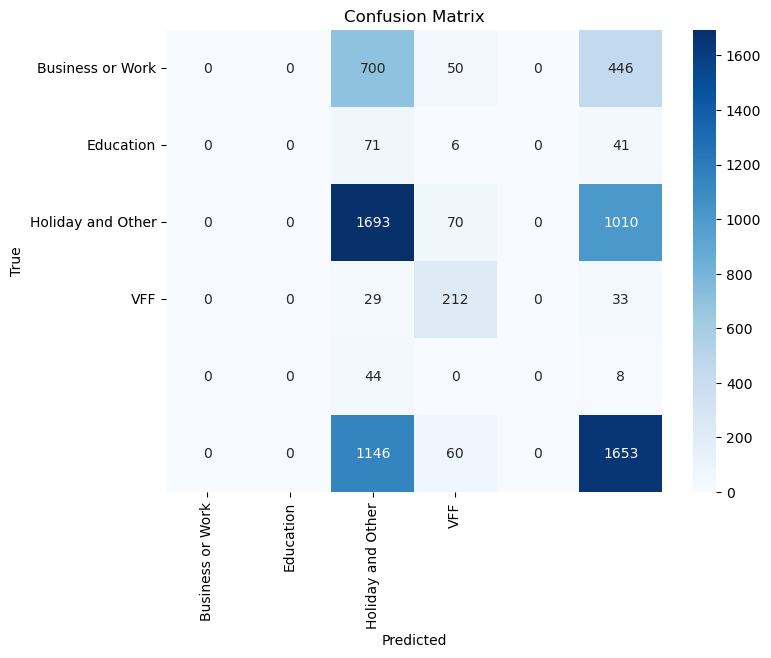

In [54]:
##Purpose ~ Nationality + Stay + Spend + Flow + Age + townvisit 1&2 + accomtype 1&2

label_encoder = LabelEncoder()

merged_df_2022['Broad_Purpose_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Purpose'])
merged_df_2022['Original_Broad_Purpose'] = label_encoder.inverse_transform(merged_df_2022['Broad_Purpose_encoded'])
label_mapping = dict(zip(merged_df_2022['Broad_Purpose_encoded'], merged_df_2022['Broad_Purpose']))

merged_df_2022['Broad_Nationality_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Nationality'])
merged_df_2022['Stay_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Stay_Category'])
merged_df_2022['Spend_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Spend_Category'])


X = merged_df_2022[['Broad_Nationality_encoded', 'Stay_Category_encoded', 'Spend_Category_encoded',
                    'Flow', 'Age']]
y = merged_df_2022['Broad_Purpose_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

model = LogisticRegression(multi_class='multinomial', max_iter=1000) #lbfgs was giving convergence warning
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

classification_report_str = classification_report(y_test_pd.map(label_mapping), y_pred_pd.map(label_mapping), zero_division=1)
print(classification_report_str)

# Assuming y_test and y_pred are already encoded labels
classNames = ['Business or Work', 'Education', 'Holiday and Other', 'VFF']


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

